In [1]:
import signac
#import flow
import freud
import msd_plot as msd
import matplotlib.pyplot as plt

In [2]:
'''
Plan:

Given a signac project:
    1. Plot and save the RDF and MSD for each individual job
    2. Perform a equilibrium analysis for each individual job
        - Compile list of jobs/state points that have/haven't reached eq
        - Function of autocorr and decorrelation times
    3. Plot and save the PE graph for each individual job
    4. At a constant temperature:
        - Find and plot the slopes of the MSD at each density.
    5. At a constant density:
        - Find and plot the slopes of the MSD at each temperature.

'''

"\nPlan:\n\nGiven a signac project:\n    1. Plot and save the RDF and MSD for each individual job\n    2. Perform a equilibrium analysis for each individual job\n        - Compile list of jobs/state points that have/haven't reached eq\n        - Function of autocorr and decorrelation times\n    3. Plot and save the PE graph for each individual job\n    4. At a constant temperature:\n        - Find and plot the slopes of the MSD at each density.\n    5. At a constant density:\n        - Find and plot the slopes of the MSD at each temperature.\n\n"

In [3]:
project = signac.get_project()  # Don't need to give it the project name if the .py file is in the same directory

In [4]:
'''
Build a dictionary of all parameters that have been varied within the project:
    Goal is to first identify only the parameters being varied within the project.
    For each of these parameters, what values were ultimately used?
'''
pscheme = project.detect_schema(exclude_const=True)
variable_parameters = [list(i)[0] for i in pscheme.keys()]
variable_dict = {}
for v in variable_parameters:
    values = sorted(list(list(pscheme[v].values())[0]))
    print(values)
    variable_dict.update({v:values})
print(variable_dict)

[0.9, 1.0, 1.1]
[1.4, 1.45, 1.5, 1.55, 1.6]
{'density': [0.9, 1.0, 1.1], 'kT_reduced': [1.4, 1.45, 1.5, 1.55, 1.6]}


1. For every job:
    - Plot RDF
    - Plot MSD
    - Determine # of ind. samples after auto-correlation & the decorrelation time
    - Plot the PE, KE, 

2. For each variable parameter (variable_parameters):
    - If both density and temperature are in the list:
        - Pick one (den/temp)
        - Pull up the values from the dict
        - For each value:
            - Hold that value as a constant
            - Plot the overlay of MSD at each value of the OTHER (den/temp)
            - Plot the msd slopes as a function of the OTHER (den/temp)
            - Plot the overlay of the RDF for each value of the other (den/temp)
        - Switch back to the other variable (den/temp)
        - Repeat the step above.
        - Add functionality later if there are more than temp and density in variable parms
            - Create multi-variable plot of MSD slopes ?

density = 0.9
[1.55, 1.6, 1.45, 1.4, 1.5]



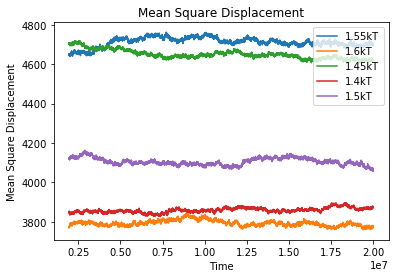

density = 1.0
[1.4, 1.6, 1.5, 1.55, 1.45]



<Figure size 432x288 with 0 Axes>

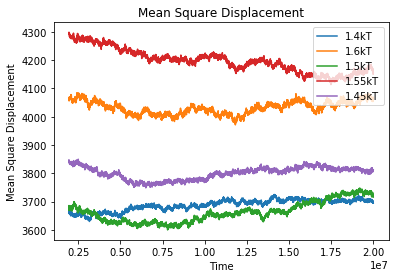

density = 1.1
[1.5, 1.4, 1.55, 1.45, 1.6]



<Figure size 432x288 with 0 Axes>

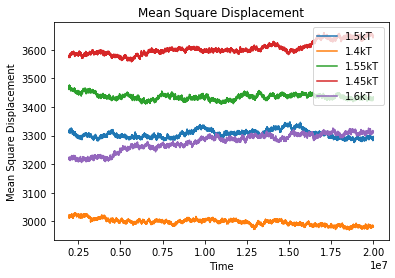

kT_reduced = 1.4
[1.0, 1.1, 0.9]



<Figure size 432x288 with 0 Axes>

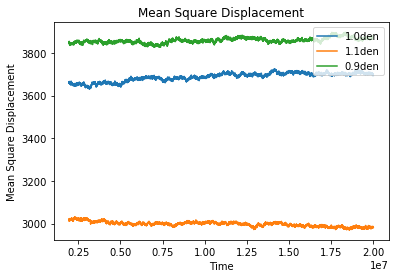

kT_reduced = 1.45
[0.9, 1.0, 1.1]



<Figure size 432x288 with 0 Axes>

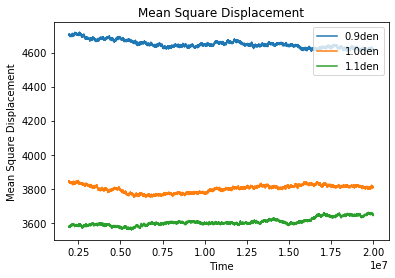

kT_reduced = 1.5
[1.1, 1.0, 0.9]



<Figure size 432x288 with 0 Axes>

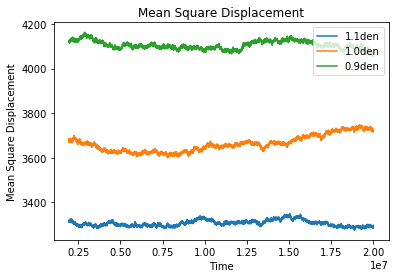

kT_reduced = 1.55
[0.9, 1.1, 1.0]



<Figure size 432x288 with 0 Axes>

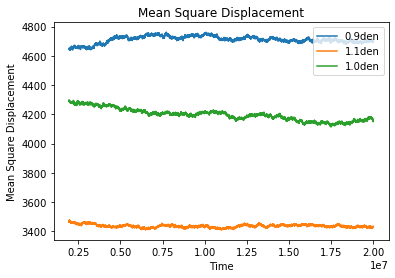

kT_reduced = 1.6
[0.9, 1.0, 1.1]



<Figure size 432x288 with 0 Axes>

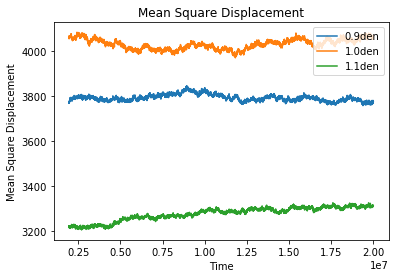

<Figure size 432x288 with 0 Axes>

In [5]:
# For variable in variable_parameters. Use indexing instead
if 'density' and 'kT_reduced' in variable_parameters:
    variable_list = ['density', 'kT_reduced']
    for i, var in enumerate(variable_list):
        # Pick a constant from the first variable
        constants = sorted(variable_dict[var])
        try:
            variable = variable_list[i + 1]
            variable_values = sorted(variable_dict[variable])
        except:
            variable = variable_list[i - 1]
            variable_values = variable_dict[variable]
        for constant in constants:
            for N, group in project.groupby(var):
                if N == constant:
                    constant_ids = [x.get_id() for x in group]
                    # TO DO:  Sort the ids in order of the variable values
                    # Sorted dict using the costant_ids and their temp values?
                    constant_files = [project.get_job("workspace/{}".format(i)).fn('msd.log')
                                                       for i in constant_ids]
                    variable_labels = [project.get_statepoint(i)[variable]
                                       for i in constant_ids]
                    print('{} = {}'.format(var, constant))
                    print(variable_labels)
                    print()
                    if var == 'density':
                        msd.plot_msd(files=constant_files, labels = False, 
                                     temperatures=variable_labels,
                                     densities=[constant], skip_frames=0.05,
                                    group_type = 'centers')
                    if var == 'kT_reduced':
                        msd.plot_msd(files=constant_files, labels=False,
                                     temperatures=[constant],
                                     densities=variable_labels, skip_frames=0.05,
                                    group_type = 'centers')

In [ ]:
#kt_red = 2.38
#for N, group in project.groupby("kT_reduced"):
#    if N == kt_red:
#        kt_ids = [x.get_id() for x in group]
#        kt_files = [project.get_job(f"workspace/{i}").fn('msd.log') for i in kt_ids]
#        taus = [project.get_statepoint(i)["tau"] for i in kt_ids]


In [19]:
'--------------------------------------------------------------------------------'

'--------------------------------------------------------------------------------'

In [11]:
# 
for N, group in project.groupby('kT_reduced'):
    for job in group:
        print(job.fn('msd.log')) # Gives you the path to particular file of interest
print()
for i in variables:
    for N, group in project.groupby(i):
        print(i)
        print(N)

/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/0d5c04dea6aa2f102fcf222891fbf17f/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/1a485dfc7240091481d2dbd75b0fab4f/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/d91d30b1d83880901ba47ebdb9329203/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/16944af6ac32df25edc981f7d1e1c047/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/4dace728fa0034085790f29166eb31b2/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/b54381951949bf95db0550bec4fe1436/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/1ea6bee8ec01b300d4e9dac6a0b5c144/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/891e22b7f18f0d03a1ea2f2ca13dbb50/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/c4da5adde422d94340e1e4b1d865dc57/msd.log
/home/chris/cme/cluster-outputs/fry/signac-practice/workspace/2bdbb0b330a

In [73]:
# Some quick, helpful things 
print(project.num_jobs())
print(project.root_directory())
print(project.workspace())

15
/home/chris/cme/clusters/fry-outputs/signac-practice
/home/chris/cme/clusters/fry-outputs/signac-practice/workspace


In [74]:
# Get entire system state point for each job
# State points are organized in a dictionary
for i in project.find_job_ids():  # Iterate through all Jobs, and get a dictionary of their state points.
    print(i)
    print(project.get_statepoint(i))
    print()

7b1c15159725b4060018df71b28b6647
{'molecule': 'PTB7_5mer_smiles', 'n_compounds': 100, 'density': 0.9, 'e_factor': 0.5, 'kT_reduced': 1.55, 'tau': 1, 'n_steps': 20000000.0, 'dt': 0.001, 'remove_hydrogens': True}

f4c7a4c149a0f7de334bdb403a4ccf94
{'molecule': 'PTB7_5mer_smiles', 'n_compounds': 100, 'density': 0.9, 'e_factor': 0.5, 'kT_reduced': 1.6, 'tau': 1, 'n_steps': 20000000.0, 'dt': 0.001, 'remove_hydrogens': True}

23dc0c0f17e109b4fc7f382e629975aa
{'molecule': 'PTB7_5mer_smiles', 'n_compounds': 100, 'density': 1.0, 'e_factor': 0.5, 'kT_reduced': 1.6, 'tau': 1, 'n_steps': 20000000.0, 'dt': 0.001, 'remove_hydrogens': True}

16944af6ac32df25edc981f7d1e1c047
{'molecule': 'PTB7_5mer_smiles', 'n_compounds': 100, 'density': 1.1, 'e_factor': 0.5, 'kT_reduced': 1.45, 'tau': 1, 'n_steps': 20000000.0, 'dt': 0.001, 'remove_hydrogens': True}

2bdbb0b330a159f01ecaa47e2ec93417
{'molecule': 'PTB7_5mer_smiles', 'n_compounds': 100, 'density': 1.0, 'e_factor': 0.5, 'kT_reduced': 1.55, 'tau': 1, 'n_st